In [1]:
# Import pandas,numpy,findspark
import pandas as pd
import numpy as np
import findspark
findspark.init()

# SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

sc=spark.sparkContext


# Package for visualization
import matplotlib.pyplot as plt   
%matplotlib inline           


# Import wordcloud,nltk.corpus
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from nltk.corpus import stopwords


# Package for image 
from PIL import Image


# Packages for removing some ("warnings")
import warnings
warnings.filterwarnings("ignore")


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/27 20:56:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
22/03/27 20:56:14 WARN Utils: Service 'SparkUI' could

In [2]:
sc=spark.sparkContext

In [3]:
#upload the 10 documents

epic_poems = sc.textFile('The_Iliad_Book_1.txt,'+'The_Iliad_Book_12.txt,'+'The_Iliad_Book_15.txt,'+'The_Iliad_Book_16.txt,'+'The_Iliad_Book_22.txt,'+'The_Odyssey_Book_2 .txt,'+'The_Odyssey_Book_11.txt,'+'The_Odyssey_Book_13.txt,'+'The_Odyssey_Book_20.txt,'+'The_Odyssey_Book_24.txt')

In [4]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [5]:
epic_poems_cleaned = epic_poems.map(lower_clean_str)
epic_poems_count = epic_poems_cleaned.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)
data = epic_poems_count.toDF()
data1 = data.toPandas()

In [6]:
#Data cleansing from prepositions
data1 = data1.rename(columns={'_1':'word', '_2':'count'})
prepositions = ['he', 'you', 'his', 'i', 'of', 'they', 'in', 'upon', 'were', 'was', 'is', 'at', 'as', 'for','us','about','up','no','if','will','now','would','did','we','now','when','do','she','one','is','they','all','be','are','my','me','them','your','who','the','a','an','and','him','so','then','which','out','into','to','with','that','it','on','but','not','have','had','from','by','their','has','her','this','or','said','has']
data1 = data1[~data1['word'].isin(prepositions)]
df = data1.sort_values('count', ascending=False).head(10)
df

,word,count
3903,son,261
2520,hector,152
3904,achaeans,149
2927,jove,145
2467,men,140
3911,ships,139
1527,trojans,132
4448,ulysses,124
4418,man,124
4423,went,120


Text(0.5, 1.0, '10 most common words in Epic Poems')

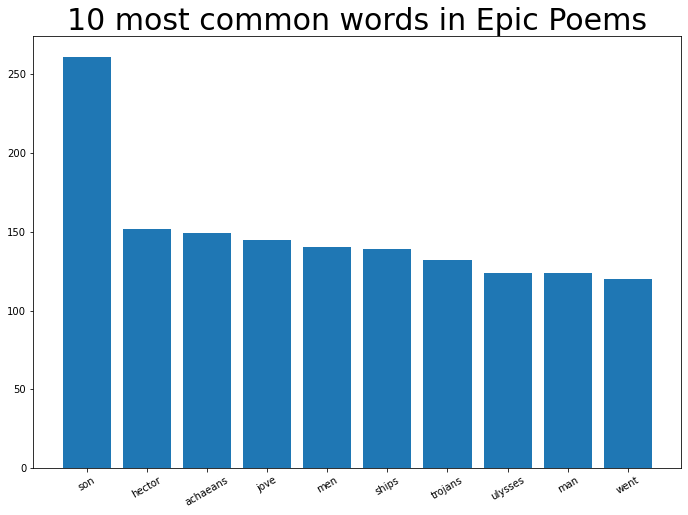

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(df['word'],df['count'])
plt.xticks(rotation=30)
plt.title("10 most common words in Epic Poems",fontdict = {'fontsize' : 30})

In [8]:
#For Odyssey Book 24

Odyssey_24 = open("The_Odyssey_Book_24.txt").read()


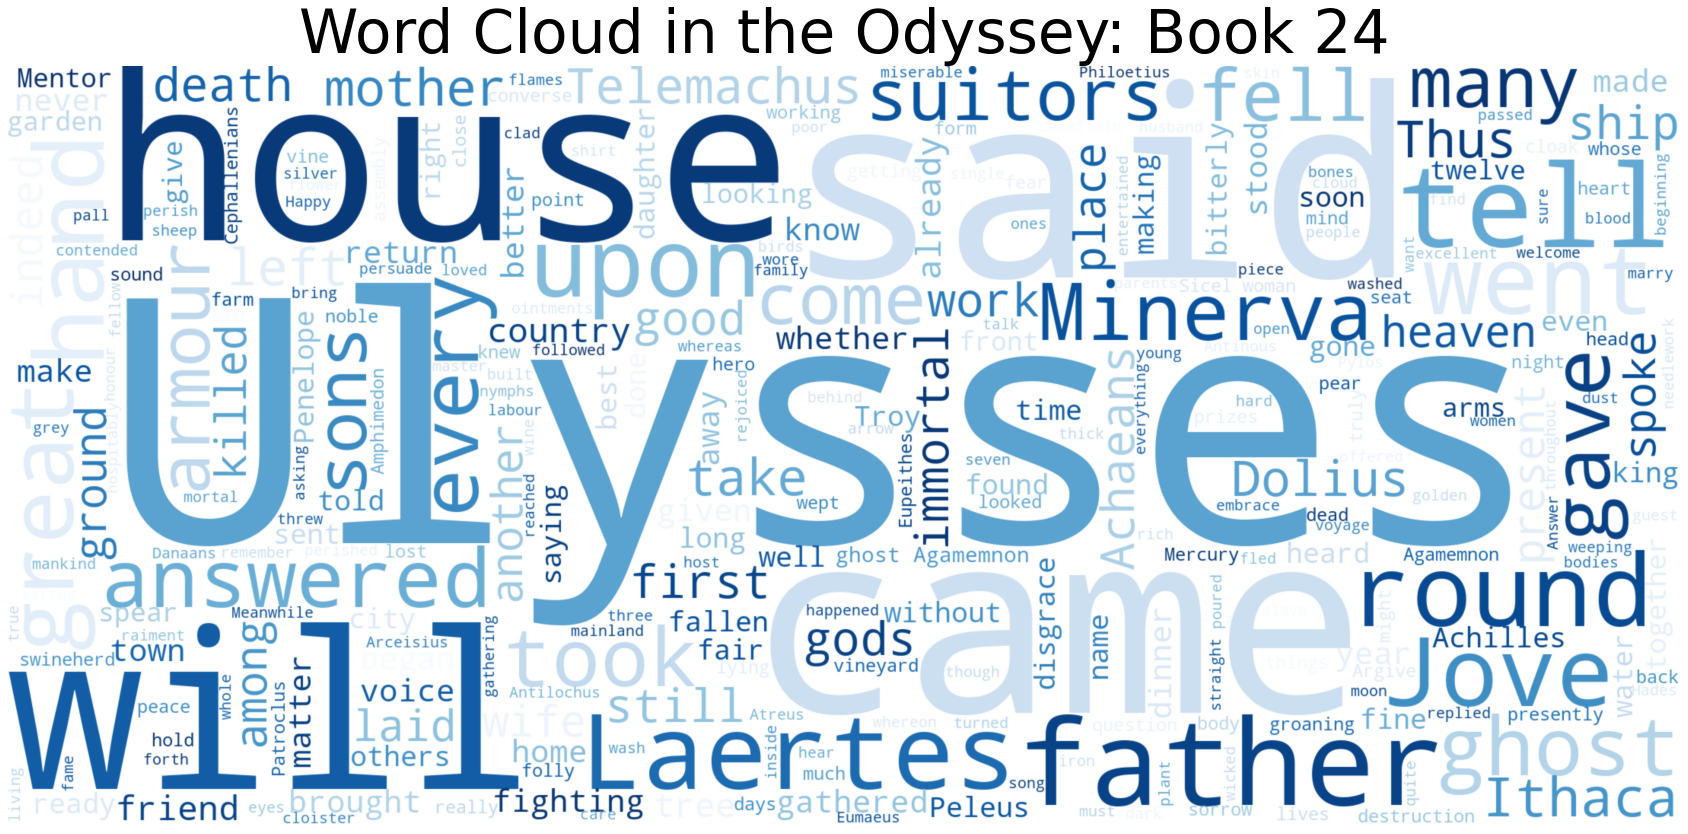

In [9]:
word_cloud = WordCloud(width = 2200,
                       height = 1000,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 300,  
                       min_word_length = 4,
                       max_font_size = 450, min_font_size = 15,  
                       background_color = "white").generate(Odyssey_24)

plt.figure(figsize = (30, 25))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.title("Word Cloud in the Odyssey: Book 24",fontdict = {'fontsize' : 60})
plt.axis("off")
plt.show()

In [10]:
#For Iliad Book 1 
Iliad_1 = open("The_Iliad_Book_1.txt").read()

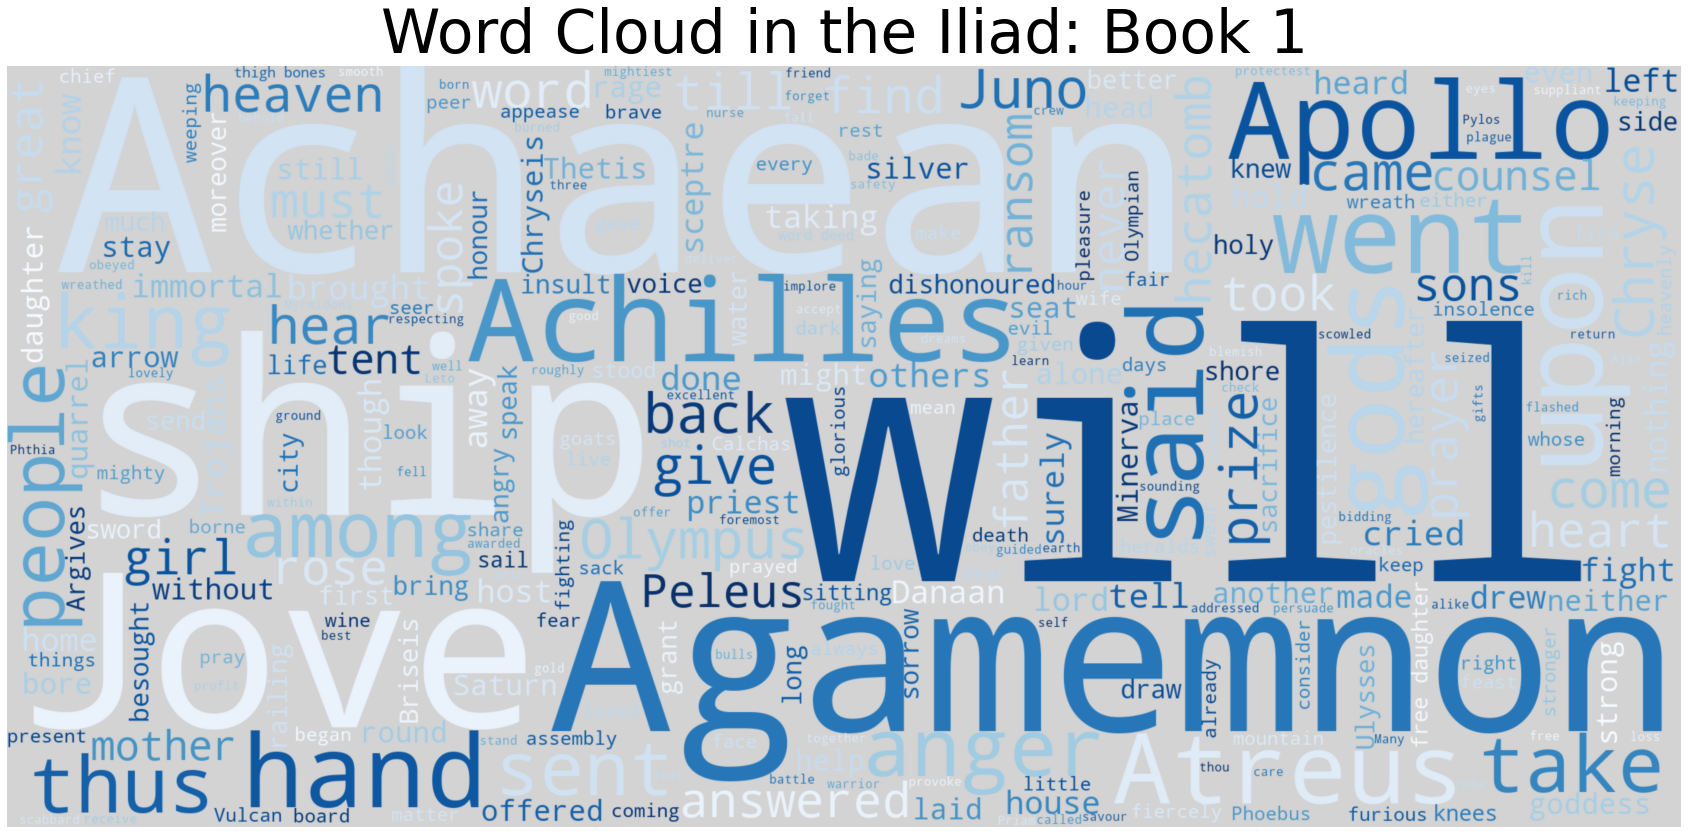

In [11]:
word_cloud = WordCloud(width = 2200,
                       height = 1000,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 300,  
                       min_word_length = 4,
                       max_font_size = 450, min_font_size = 15,  
                       background_color = "lightgrey").generate(Iliad_1)

plt.figure(figsize = (30, 25))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.title("Word Cloud in the Iliad: Book 1",fontdict = {'fontsize' : 60})
plt.axis("off")
plt.show()

In [12]:
#upload image of Homer for Word Cloud 
homer = np.array(Image.open('homer1.png'))

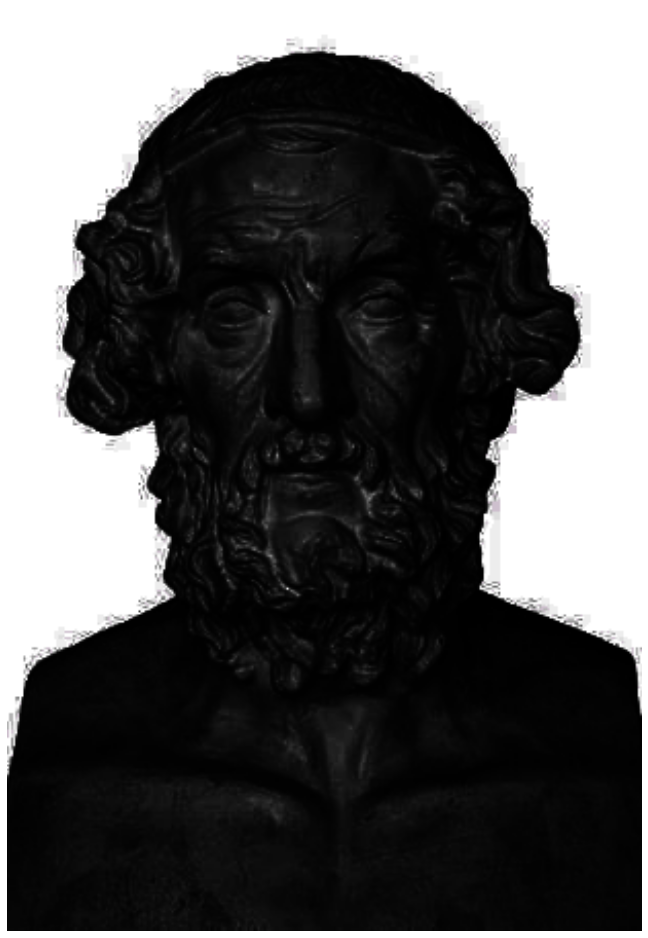

In [13]:
fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17) # set height
plt.imshow(homer, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

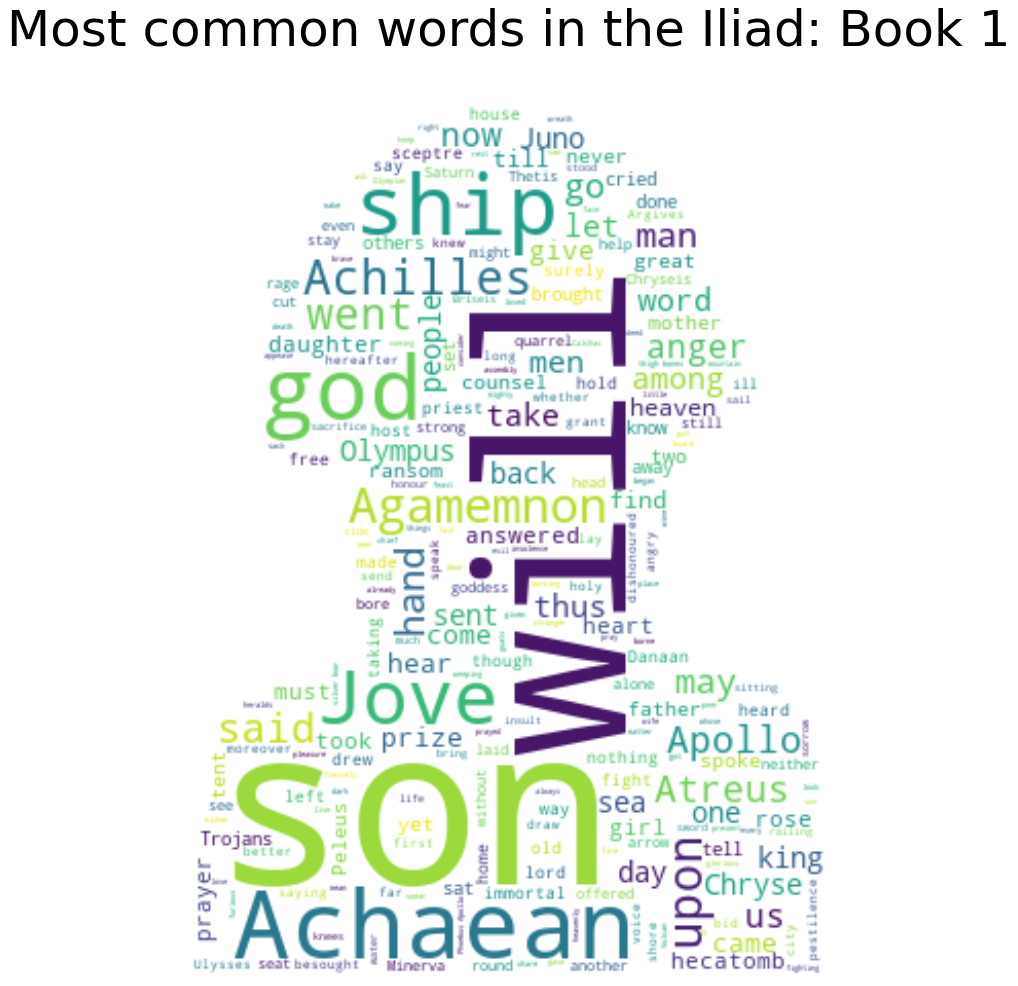

In [14]:
homer_wc = WordCloud(background_color='white', max_words=2000, mask=homer)
# generate the word cloud for Iliad_1
homer_wc.generate(Iliad_1)
# display the word cloud
fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17) # set height
plt.imshow(homer_wc, interpolation='bilinear')
plt.title("Most common words in the Iliad: Book 1",fontdict = {'fontsize' : 50})
plt.axis('off')
plt.show()